In [1]:
import pandas as pd
import numpy as np

In [2]:
gossip_fake_file_path = "Dataset\gossipcop_fake.csv"
politifact_fake_file_path = "Dataset\politifact_fake.csv"
gossip_fake = pd.read_csv(gossip_fake_file_path)
politifact_fake = pd.read_csv(politifact_fake_file_path)

print(gossip_fake.shape, politifact_fake.shape)

(5323, 4) (432, 4)


In [3]:
gossip_real_file_path = "Dataset\gossipcop_real.csv"
politifact_real_file_path = "Dataset\politifact_real.csv"

gossip_real = pd.read_csv(gossip_real_file_path)
politifact_real = pd.read_csv(politifact_real_file_path)

print(gossip_real.shape, politifact_real.shape)

(16817, 4) (624, 4)


In [4]:
fake_df = pd.concat([gossip_fake, politifact_fake], axis=0)
real_df = pd.concat([gossip_real, politifact_real], axis=0)
# real_df = pd.concat([gossip_real[:gossip_fake.shape[0]], politifact_real[:politifact_fake.shape[0]]], axis=0)

print(fake_df.shape, real_df.shape)

(5755, 4) (17441, 4)


In [5]:
fake_df['label'] = 0
real_df['label'] = 1

In [6]:
fake_df.drop(columns=["id", "news_url", "tweet_ids"], inplace=True)
fake_df.rename(columns={'title':'statement'}, inplace=True)

real_df.drop(columns=["id", "news_url", "tweet_ids"], inplace=True)
real_df.rename(columns={'title':'statement'}, inplace=True)


In [7]:
news_df = pd.concat([fake_df, real_df], axis=0)
news_df['label'].value_counts()

label
1    17441
0     5755
Name: count, dtype: int64

label
1    17441
0     5755
Name: count, dtype: int64


<BarContainer object of 2 artists>

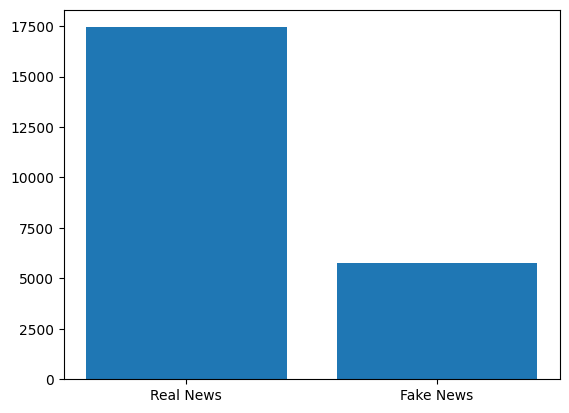

In [8]:
import matplotlib.pyplot as plt
print(news_df['label'].value_counts())
labels = ['Real News', 'Fake News']
plt.bar(labels, news_df['label'].value_counts().values)

In [9]:
news_df.to_csv('./Dataset/FakeNewsNet.csv')

In [10]:
from datasets import load_dataset
liar_ds = load_dataset("liar")

In [11]:
liar_train_df = pd.DataFrame(liar_ds['train'])
liar_test_df = pd.DataFrame(liar_ds['test'])
liar_val_df = pd.DataFrame(liar_ds['validation'])

In [12]:
liar_train_df = liar_train_df[['statement', 'label']]
liar_test_df = liar_test_df[['statement', 'label']]
liar_val_df = liar_val_df[['statement', 'label']]

In [13]:
liar_df = pd.concat([liar_train_df, liar_test_df, liar_val_df], axis=0)
liar_df['label'].value_counts()

label
1    2638
0    2511
2    2466
4    2108
3    2063
5    1050
Name: count, dtype: int64

In [14]:
liar_df.loc[liar_df['label'] == 1, 'label'] = 1 #True
liar_df.loc[liar_df['label'] == 2, 'label'] = 1
liar_df.loc[liar_df['label'] == 3, 'label'] = 1

liar_df.loc[liar_df['label'] == 0, 'label'] = 0 #Fake
liar_df.loc[liar_df['label'] == 4, 'label'] = 0
liar_df.loc[liar_df['label'] == 5, 'label'] = 0

# liar_df.loc[liar_df['label'] == 2, 'label'] = 0 #True

In [15]:
value_counts = liar_df['label'].value_counts()
value_counts

label
1    7167
0    5669
Name: count, dtype: int64

label
1    7167
0    5669
Name: count, dtype: int64


<BarContainer object of 2 artists>

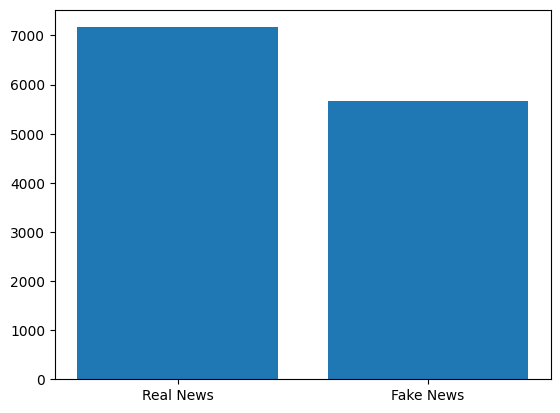

In [16]:
import matplotlib.pyplot as plt
print(liar_df['label'].value_counts())
labels = ['Real News', 'Fake News']
plt.bar(labels, liar_df['label'].value_counts().values)

In [17]:
liar_df.to_csv('./Dataset/Liar.csv')

In [18]:
# df = pd.concat([liar_df, fake_df], axis = 0)
df = pd.concat([news_df, liar_df.loc[liar_df['label'] == 0]], axis = 0)
# df = news_df

In [19]:
value_counts = df['label'].value_counts()
value_counts

label
1    17441
0    11424
Name: count, dtype: int64

In [20]:
df = df.sample(frac = 1).reset_index(drop=True)
df.to_csv('./Dataset/Combined_Data.csv')

In [21]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_punctuations(word):
    pattern=r'[^\w\s]'
    return re.sub(pattern,' ',word).lower()

def remove_stopwords(word):
    stop_words = set(stopwords.words('english'))
    words = word.split()
    # filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    filtered_words = [word.lower() for word in words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df['statement'] = df['statement'].apply(remove_punctuations)
# df['statement'] = df['statement'].apply(remove_stopwords)

In [23]:
print("Columns of cleaned df:",df.columns)

Columns of cleaned df: Index(['statement', 'label'], dtype='object')


label
1    17441
0    11424
Name: count, dtype: int64


<BarContainer object of 2 artists>

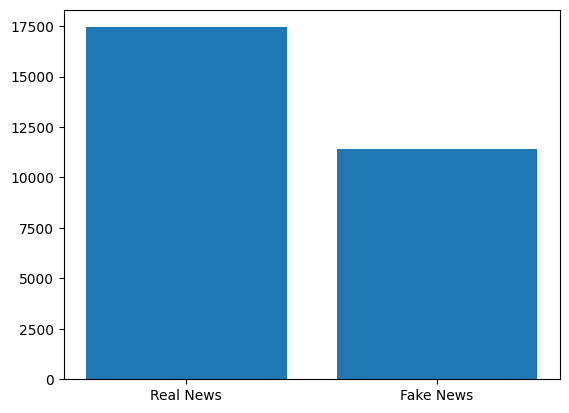

In [24]:
import matplotlib.pyplot as plt
print(df['label'].value_counts())
labels = ['Real News', 'Fake News']
plt.bar(labels, df['label'].value_counts().values)

In [25]:
words = set()
num = 0
for statement in df['statement']:
    word=statement.split()
    for w in word:
        if(w not in words):
            if(w.isnumeric()):
                num += 1
            words.add(w)
            
print("length is", len(words))
print("total numbers", num)
print(words)


length is 21690
total numbers 414
{'outundocumented', 'enforce', 'disappointment', 'classify', 'daugherty', 'coyotes', 'nettle', 'chai', 'authorities', 'reconnect', 'leeanne', 'incoming', 'foo', 'breeding', 'partial', 'moratorium', 'shed', 'explores', 'amazons', 'fluorescent', 'painstakingly', 'porizkova', 'struts', 'wolverine', 'regrets', 'seminole', 'afford', 'atlantic', 'melrose', 'sin', 'suri', 'worrisome', 'reuses', 'okay', 'napolitano', '50cent', 'bloodline', 'wright', 'measurably', 'thevalley', 'traumatized', 'squeezing', 'concentrate', 'smoosh', 'lynda', 'bhalla', 'hallelujah', 'controversalremarks', 'unpleasant', 'strap', 'ov', 'gotta', 'pope', 'uninsured', 'move', 'howard', 'spectatorship', 'chips', 'applebee', 'outer', 'teenmom', 'designed', 'darke', 'budge', 'newborn', 'olympic', 'exclusive', 'settled', 'olsen', 'forty', 'reno', 'chocolates', 'successfully', 'targaryen', 'flowers', 'broderick', 'investigators', 'tvd', 'jangle', 'strategist', 'through', 'ritual', 'vacated', 

In [26]:
data = list(zip(df['label'], df['statement']))
data

[(1,
  'kim kardashian shares new images from makeup collaboration with kylie jenner'),
 (0, 'says illinois democrat david gill would end medicare '),
 (0,
  'aaron carter worried about past gay lovers revealing secrets is fake news'),
 (1, 'awards news'),
 (0, 'angelina jolie gets new divorce lawyer amid brad pitt custody battle'),
 (1,
  'try not to get jealous reading about ellen degeneres  star studded 60th birthday party'),
 (1, 'james van der beek and wife kimberly welcome baby no  5 '),
 (1,
  'yes  that is queen elizabeth sitting next to anna wintour in the front row of london fashion week'),
 (1, '5 reasons kristen bell is going to ace hosting the sag awards'),
 (1, 'usher dances with julianne hough and rita ora to   yeah    at party'),
 (1,
  'kim kardashian must be confident in her double sided tape  goes shirtless at lacma gala'),
 (1, 'raven s home'),
 (1, 'abby lee miller sentenced to a year and a day in prison'),
 (1, 'nicole curtis separated from son on thanksgiving'),


In [27]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchtext.transforms as T
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import Dataset, DataLoader,random_split

import spacy

In [28]:
torch.cuda.is_available()

True

In [29]:
vocab_size = len(words)
eng = spacy.load("en_core_web_sm") 
def tokenizer(text):
    return [token.text for token in eng.tokenizer(text)]

def getTokens(data):
    for _, text in data:
        yield tokenizer(text)
        
source_vocab = build_vocab_from_iterator(
    getTokens(data),
    min_freq = 0,
    specials = ['<pad>','<sos>','<eos>', '<unk>'],
    special_first = True
)

source_vocab.set_default_index(source_vocab["<unk>"])

c:\Users\kesha\gpu_env\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\kesha\gpu_env\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [30]:
def getTransform(vocab):
    text_tranform = T.Sequential(
        ## converts the sentences to indices based on given vocabulary
        T.VocabTransform(vocab=vocab),
        ## Add <sos> at beginning of each sentence. 1 because the index for <sos> in vocabulary is
        # 1 as seen in previous section
        T.AddToken(1, begin=True),
        ## Add <eos> at beginning of each sentence. 2 because the index for <eos> in vocabulary is
        # 2 as seen in previous section
        T.AddToken(2, begin=False)
    )
    return text_tranform

In [31]:
text_pipeline = lambda x:getTransform(source_vocab)(tokenizer(x))

In [32]:
max_len = -1
for _, text in data:
    max_len = max(len(text_pipeline(text)),max_len)
print(max_len)

76


In [33]:
is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(f"Device: {device}")

Device: cuda


In [34]:
class NewsData(Dataset):
    def __init__(self,text,label, max_len):
        self.text = text
        self.label = label
        self.max_len = max_len
    
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self,idx):
        text = self.text.iloc[idx]
        tokenized_text = text_pipeline(text).copy()
        
        for _ in range(self.max_len - len(tokenized_text)):
            tokenized_text.append(0)
            
        tokenized_text = torch.tensor(tokenized_text)
        label = torch.tensor(self.label.iloc[idx])
        
        return tokenized_text.to(device),label.to(device)

In [35]:
# df = df.sample(frac = 1).reset_index(drop=True)
dataset = NewsData(df['statement'], df['label'], max_len)

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train, val, test = random_split(dataset, [train_size, val_size, test_size], generator = torch.Generator().manual_seed(42))
train_data = DataLoader(train, batch_size=64)
val_data = DataLoader(val, batch_size=64)
test_data = DataLoader(test, batch_size=64)

In [36]:
index_to_string = source_vocab.get_itos()

In [37]:
for data in val_data:
    text, label = data
    sen = text[15]
    for i in sen:
        print(index_to_string[i], end=" ")
    print("\n", label)
    break


<sos> grammy winner pink graces the cover of people s beautiful issue with her two kids <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 
 tensor([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], device='cuda:0')


In [38]:
from torchsummary import summary

# Bidirectional GRU Model

In [39]:
class BidirectionalGRU(nn.Module):
    def __init__(self, vocab_size, embedding_dim=256):
        super(BidirectionalGRU,self).__init__()
        self.Embeddings = nn.Embedding(num_embeddings=vocab_size,embedding_dim=embedding_dim)
        self.GRU = nn.GRU(input_size = embedding_dim, hidden_size = 128, num_layers = 1, bias = True, batch_first = True, bidirectional = True)
        self.fc1 = nn.Linear(128*2,64)
        self.fc2 = nn.Linear(64,1)

    def forward(self,x):
        x = x.to(torch.int64)
        x = self.Embeddings(x)
        x, _ = self.GRU(x)
        x = x[:,-1,:]
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.Sigmoid()(x)
        return x
        

In [40]:
model = BidirectionalGRU(vocab_size, 512).to(device=device)
optimizer = optim.Adam(model.parameters(), lr = 10**(-4))
criterion = nn.BCELoss()

epochs = 10
prev_loss = float('inf')
early_stop_count = 0

train_loss_arr = []
train_accuracy_arr = []

val_loss_arr = []
val_accuracy_arr = []

for epoch in range(epochs):
    #Training
    corrects = 0
    running_loss = 0.0
    count = 0
    model.train()
    for data in train_data:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs).reshape(-1)
        loss = criterion(outputs.float(), labels.float())
        
        preds = (outputs>0.5).int()
        count += len(preds)
        corrects += torch.sum(preds==labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss_arr.append(running_loss / count)
    train_accuracy_arr.append(corrects.item() / count)
    print(f"Epoch:{epoch+1}/{epochs} | Training loss:{running_loss/count} | Training Accuracy:{corrects/count}")
    
    #Validation
    count = 0
    corrects = 0
    running_loss = 0.0
    model.eval()
    with torch.no_grad():
        for data in val_data:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).reshape(-1)
            loss = criterion(outputs.float(), labels.float())
            preds = (outputs>0.5).int()
            count += len(preds)
            corrects += torch.sum(preds==labels)
            running_loss += loss.item()
            
        # #Early Stopping
        # if running_loss > prev_loss:
        #     early_stop_count += 1
        #     if early_stop_count == 2:
        #         break
        # else:
        #     early_stop_count = 0
        # prev_loss = running_loss
        
    val_loss_arr.append(running_loss / count)
    val_accuracy_arr.append(corrects.item() / count)
    print(f"Epoch:{epoch+1}/{epochs} | Validation Loss:{running_loss/count} | Validation Accuracy:{corrects/count}")

Epoch:1/10 | Training loss:0.010383755539084315 | Training Accuracy:0.6070500612258911
Epoch:1/10 | Validation Loss:0.009889231567488556 | Validation Accuracy:0.6271656155586243
Epoch:2/10 | Training loss:0.007675209693596472 | Training Accuracy:0.773601233959198
Epoch:2/10 | Validation Loss:0.006814413149573286 | Validation Accuracy:0.8132362961769104
Epoch:3/10 | Training loss:0.005767904309126444 | Training Accuracy:0.8492984771728516
Epoch:3/10 | Validation Loss:0.006375224988491934 | Validation Accuracy:0.8267498016357422
Epoch:4/10 | Training loss:0.004832590869022122 | Training Accuracy:0.8804348111152649
Epoch:4/10 | Validation Loss:0.006340294512284355 | Validation Accuracy:0.8295218348503113
Epoch:5/10 | Training loss:0.004118110567380357 | Training Accuracy:0.9026069641113281
Epoch:5/10 | Validation Loss:0.0066109373616938865 | Validation Accuracy:0.8319473266601562
Epoch:6/10 | Training loss:0.00348493324103253 | Training Accuracy:0.9221808314323425
Epoch:6/10 | Validation 

In [41]:
count = 0
corrects = 0
running_loss = 0.0
test_loss_arr = []
test_accuracy_arr = []

pred_prob = []
pred_labels = []
gt_labels = []

model.eval()
with torch.no_grad():
    for data in test_data:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs).reshape(-1)
        # print(outputs.shape)
        loss = criterion(outputs.float(), labels.float())
        preds = (outputs>0.5).int()
        count += len(preds)
        corrects += torch.sum(preds==labels)
        running_loss += loss.item()
        # print(preds, end = None)
        
        for output in outputs.tolist():
            pred_prob.append(output)
            
        for pred in preds.tolist():
            pred_labels.append(pred)
        
        for label in labels.tolist():
            gt_labels.append(label)

test_loss_arr.append(running_loss/count)
test_accuracy_arr.append(corrects.item() /count)
print(f"Test Loss:{running_loss/count} | Test accuracy:{corrects/count}")

Test Loss:0.009052861607070608 | Test accuracy:0.8209213614463806


In [42]:
summary(model, (max_len,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Embedding-1              [-1, 76, 512]      11,105,280
               GRU-2  [[-1, 76, 256], [-1, 2, 128]]               0
            Linear-3                   [-1, 64]          16,448
            Linear-4                    [-1, 1]              65
Total params: 11,121,793
Trainable params: 11,121,793
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 37.70
Params size (MB): 42.43
Estimated Total Size (MB): 80.13
----------------------------------------------------------------


In [43]:
print(len(gt_labels))
print(len(pred_prob))
print(len(pred_labels))

2887
2887
2887


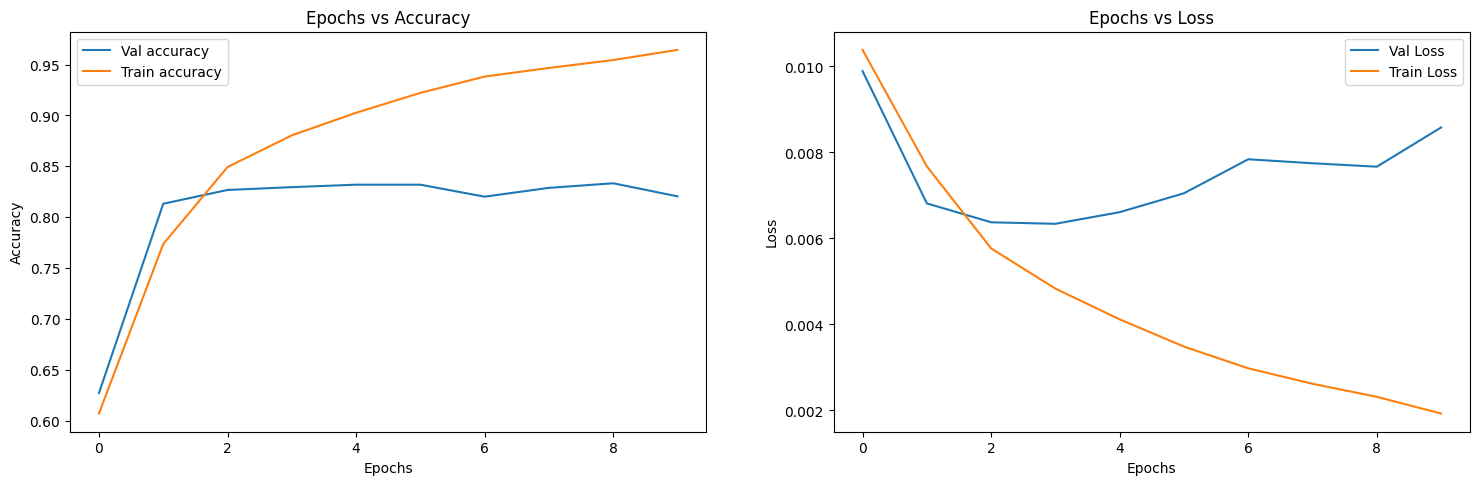

In [44]:
import matplotlib.pyplot as plt

def plot(epochs,val_acc,train_acc,val_loss,train_loss):
    epochs=range(epochs)
    fig,axes=plt.subplots(1,2,figsize=(10,5))
    plt.subplots_adjust(left=0.1, right=1.5, bottom=0.1, top=0.9)
    axes[0].plot(epochs,val_acc)
    axes[0].plot(epochs,train_acc)
    axes[0].set_title("Epochs vs Accuracy")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend(['Val accuracy','Train accuracy'])

    axes[1].plot(epochs,val_loss)
    axes[1].plot(epochs,train_loss)
    axes[1].set_title("Epochs vs Loss")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Loss")
    axes[1].legend(['Val Loss','Train Loss'])
    plt.show()
    
plot(epochs,val_accuracy_arr,train_accuracy_arr,val_loss_arr,train_loss_arr)

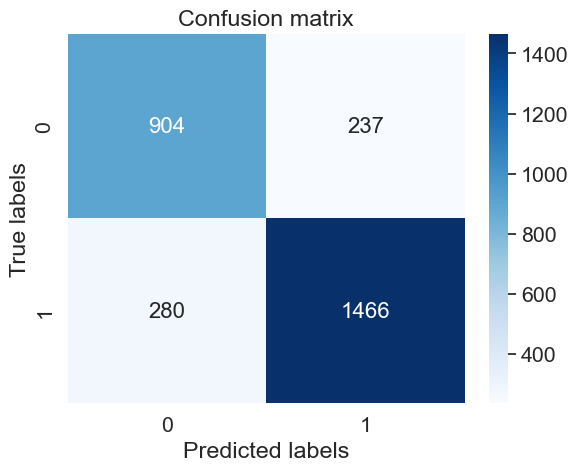

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion_mat(true_labels,pred_labels):
    cm=confusion_matrix(true_labels,pred_labels)
    sns.set(font_scale=1.4) 
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion matrix")
    plt.show()
confusion_mat(gt_labels,pred_labels)

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
def scores(true_labels,pred_labels):
    precision=precision_score(true_labels,pred_labels)
    recall=recall_score(true_labels,pred_labels)
    f1=f1_score(true_labels,pred_labels)
    print(f"Precision:{precision:.2f}\nRecall:{recall:.2f}\nF1 score:{f1:.2f}")
scores(gt_labels,pred_labels)

Precision:0.86
Recall:0.84
F1 score:0.85


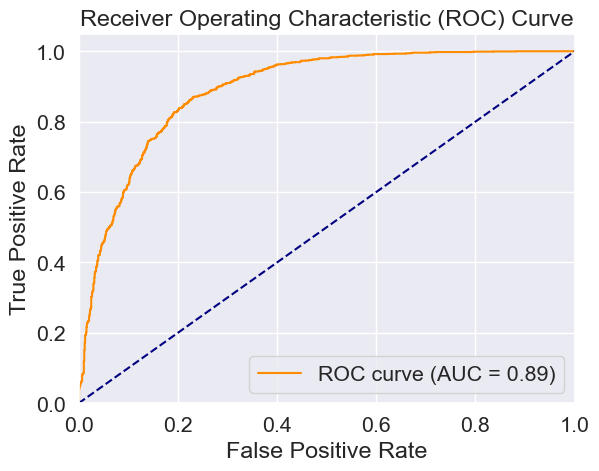

In [47]:
from sklearn.metrics import roc_curve, auc

def roc_plot(true_labels,pred_probs):
    fpr, tpr, _ = roc_curve(true_labels, pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
roc_plot(gt_labels, pred_prob)

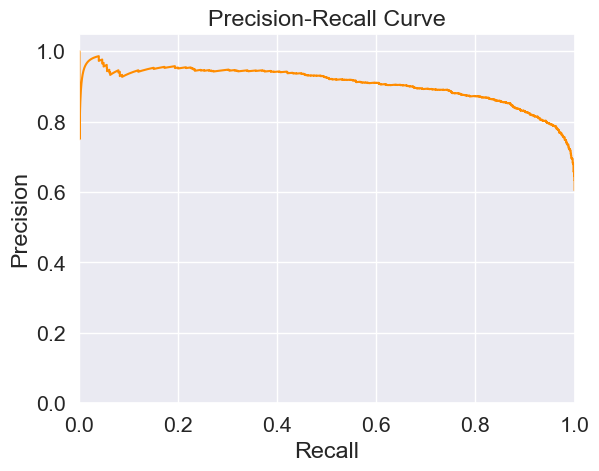

In [48]:
from sklearn.metrics import precision_recall_curve
def prec_recall_curve(true_labels,pred_probs):
    precision, recall, _ = precision_recall_curve(true_labels, pred_probs)
    plt.figure()
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.show()
prec_recall_curve(gt_labels,pred_prob)

In [49]:
news = "one claims report vindicating new jersey gov chris christie bridge scandal conclusive candidates biography infrastructure rudy giuliani attorney new york republican comments nbc meet press"
# news = "Social Security Administration data shows the number of voters registering without a photo ID is skyrocketing in three key swing states, evidence that migrants who entered the country illegally are registering to vote in Arizona, Texas and Pennsylvania"
# news = "The National Football Conference (NFC) champion Philadelphia Eagles defeated the American Football Conference (AFC) and defending Super Bowl LI champion New England Patriots, 41–33, to win their first Super Bowl and their first NFL title since 1960."

In [50]:
tokenized_news = text_pipeline(news)
news_tensor = torch.tensor(tokenized_news).unsqueeze(0).to(device)
# print(news_tensor.shape)
outputs = model(news_tensor)
preds = (outputs.item()>0.5)

if preds == 0:
    print(f"Fake news with probability: {1 - outputs.item()}")
else:
    print(f"Genuine News with probability: {outputs.item()}")

Fake news with probability: 0.8911368995904922


# Transformer Model

In [51]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len = 512):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]
            

class Transformer(nn.Module):
    def __init__(self, vocab_size, d_model, n_heads, num_layers, output_size):
        super(Transformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, n_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc1 = nn.Linear(d_model, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
        
        
    def forward(self, x):
        x = x.to(torch.int64)
        x = self.embedding(x)
        x = self.positional_encoding(x)
        # print(x.shape)
        # x = x.permute(1, 0, 2)
        # print(x.shape)
        x = self.transformer(x)
        x = x.mean(dim = 1)
        # print(x.shape)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [52]:
transformer_model = Transformer(vocab_size=vocab_size, d_model=512, n_heads=8, num_layers=1, output_size=1).to(device=device)
transformer_optimizer = optim.Adam(transformer_model.parameters(), lr = 10**(-4))
# transformer_optimizer = optim.SGD(transformer_model.parameters(), lr = 0.001, momentum = 0.9)
criterion = nn.BCELoss()

epochs = 10
prev_loss = float('inf')
early_stop_count = 0

train_loss_arr = []
train_accuracy_arr = []

val_loss_arr = []
val_accuracy_arr = []

for epoch in range(epochs):
    #Training
    corrects = 0
    running_loss = 0.0
    count = 0
    transformer_model.train()
    for data in train_data:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        transformer_optimizer.zero_grad()
        outputs = transformer_model(inputs).reshape(-1)
        loss = criterion(outputs.float(), labels.float())
        preds = (outputs>0.5).int()
        count += len(preds)
        corrects += torch.sum(preds==labels)
        loss.backward()
        transformer_optimizer.step()
        running_loss += loss.item()
        
    train_loss_arr.append(running_loss / count)
    train_accuracy_arr.append(corrects.item() / count)
    print(f"Epoch:{epoch+1}/{epochs} | Training loss:{running_loss/count} | Training Accuracy:{corrects/count}")
    
    #Validation
    count = 0
    corrects = 0
    running_loss = 0.0
    transformer_model.eval()
    with torch.no_grad():
        for data in val_data:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = transformer_model(inputs).reshape(-1)
            loss = criterion(outputs.float(), labels.float())
            preds = (outputs>0.5).int()
            count += len(preds)
            corrects += torch.sum(preds==labels)
            running_loss += loss.item()
            
        # #Early Stopping
        # if running_loss > prev_loss:
        #     early_stop_count += 1
        #     if early_stop_count == 2:
        #         break
        # else:
        #     early_stop_count = 0
        # prev_loss = running_loss
        
    val_loss_arr.append(running_loss / count)
    val_accuracy_arr.append(corrects.item() / count)
    print(f"Epoch:{epoch+1}/{epochs} | Validation Loss:{running_loss/count} | Validation Accuracy:{corrects/count}")

c:\Users\kesha\gpu_env\lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch:1/10 | Training loss:0.008268413451243248 | Training Accuracy:0.7411224842071533
Epoch:1/10 | Validation Loss:0.0071770489649564465 | Validation Accuracy:0.7983368039131165
Epoch:2/10 | Training loss:0.0063999456990876105 | Training Accuracy:0.8190282583236694
Epoch:2/10 | Validation Loss:0.006365974235580105 | Validation Accuracy:0.8239778280258179
Epoch:3/10 | Training loss:0.005594335802295645 | Training Accuracy:0.8440152406692505
Epoch:3/10 | Validation Loss:0.0062738638539035045 | Validation Accuracy:0.827789306640625
Epoch:4/10 | Training loss:0.004960071157406588 | Training Accuracy:0.8643686175346375
Epoch:4/10 | Validation Loss:0.006592052778950683 | Validation Accuracy:0.8264033198356628
Epoch:5/10 | Training loss:0.004488744794749396 | Training Accuracy:0.8800017237663269
Epoch:5/10 | Validation Loss:0.0076556271839207934 | Validation Accuracy:0.8031877875328064
Epoch:6/10 | Training loss:0.0040525547029518615 | Training Accuracy:0.8939026594161987
Epoch:6/10 | Valida

In [53]:
count = 0
corrects = 0
running_loss = 0.0
test_loss_arr = []
test_accuracy_arr = []

pred_prob = []
pred_labels = []
gt_labels = []

transformer_model.eval()
with torch.no_grad():
    for data in test_data:
        inputs, labels = data
        # print(data.shape)
        outputs = transformer_model(inputs).reshape(-1)
        loss = criterion(outputs.float(), labels.float())
        preds = (outputs>0.5).int()
        count += len(preds)
        corrects += torch.sum(preds==labels)
        running_loss += loss.item()
        # print(preds, end = None)
        
        for output in outputs.tolist():
            pred_prob.append(output)
            
        for pred in preds.tolist():
            pred_labels.append(pred)
        
        for label in labels.tolist():
            gt_labels.append(label)

test_loss_arr.append(running_loss / count)
test_accuracy_arr.append(corrects.item() / count)

print(f"Test Loss:{running_loss/count} | Test accuracy:{corrects/count}")

Test Loss:0.007719025467459537 | Test accuracy:0.8247315287590027


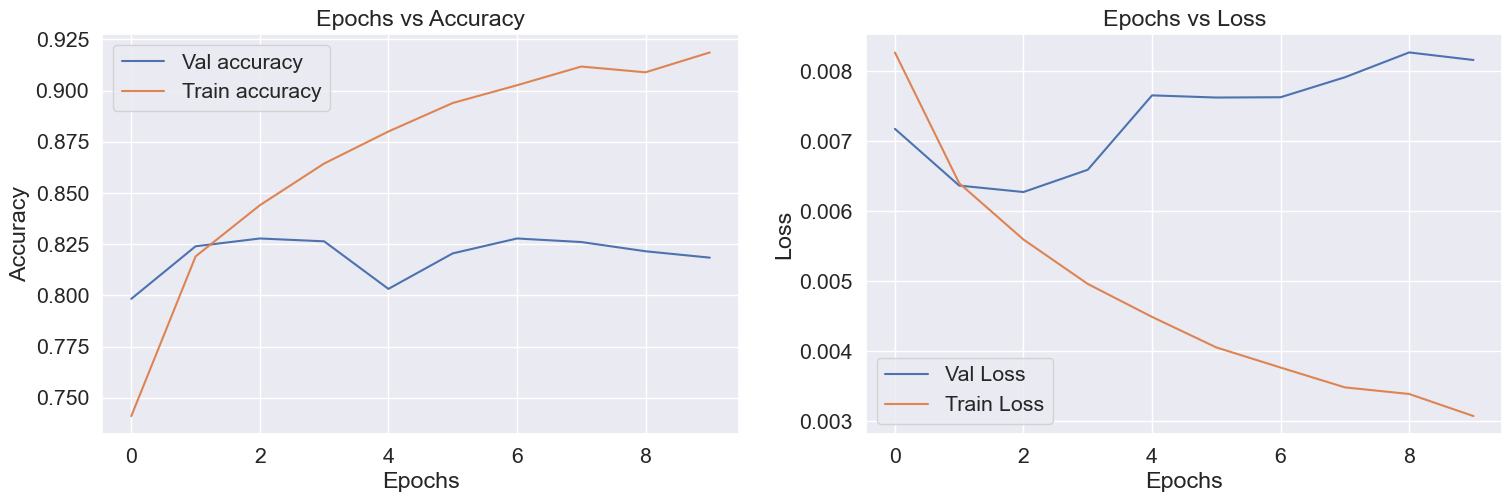

In [54]:
import matplotlib.pyplot as plt

def plot(epochs,val_acc,train_acc,val_loss,train_loss):
    epochs=range(epochs)
    fig,axes=plt.subplots(1,2,figsize=(10,5))
    plt.subplots_adjust(left=0.1, right=1.5, bottom=0.1, top=0.9)
    axes[0].plot(epochs,val_acc)
    axes[0].plot(epochs,train_acc)
    axes[0].set_title("Epochs vs Accuracy")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend(['Val accuracy','Train accuracy'])

    axes[1].plot(epochs,val_loss)
    axes[1].plot(epochs,train_loss)
    axes[1].set_title("Epochs vs Loss")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Loss")
    axes[1].legend(['Val Loss','Train Loss'])
    plt.show()
    
plot(epochs,val_accuracy_arr,train_accuracy_arr,val_loss_arr,train_loss_arr)

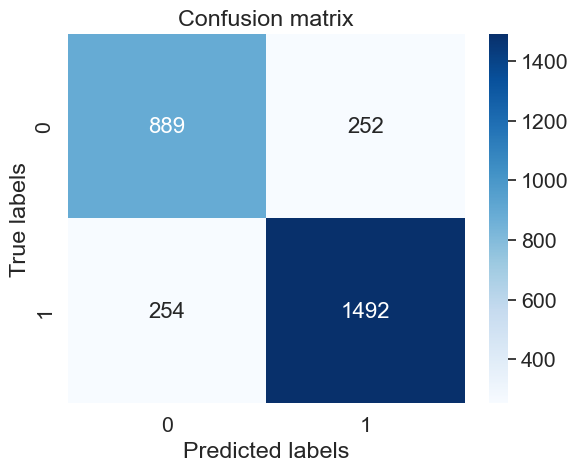

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion_mat(true_labels,pred_labels):
    cm=confusion_matrix(true_labels,pred_labels)
    sns.set(font_scale=1.4) 
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion matrix")
    plt.show()
confusion_mat(gt_labels,pred_labels)

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score
def scores(true_labels,pred_labels):
    precision=precision_score(true_labels,pred_labels)
    recall=recall_score(true_labels,pred_labels)
    f1=f1_score(true_labels,pred_labels)
    print(f"Precision:{precision:.2f}\nRecall:{recall:.2f}\nF1 score:{f1:.2f}")
scores(gt_labels,pred_labels)

Precision:0.86
Recall:0.85
F1 score:0.86


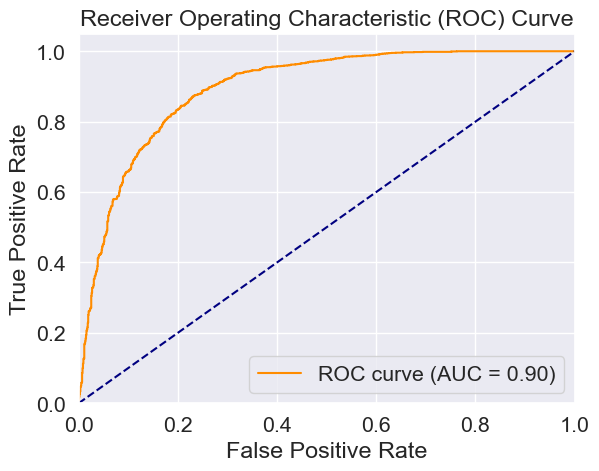

In [57]:
from sklearn.metrics import roc_curve, auc

def roc_plot(true_labels,pred_probs):
    fpr, tpr, _ = roc_curve(true_labels, pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
roc_plot(gt_labels, pred_prob)

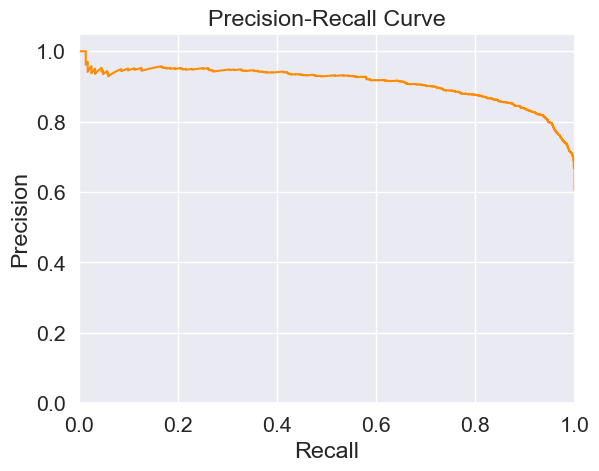

In [58]:
from sklearn.metrics import precision_recall_curve
def prec_recall_curve(true_labels,pred_probs):
    precision, recall, _ = precision_recall_curve(true_labels, pred_probs)
    plt.figure()
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.show()
prec_recall_curve(gt_labels,pred_prob)

In [59]:
news = "one claims report vindicating new jersey gov chris christie bridge scandal conclusive candidates biography infrastructure rudy giuliani attorney new york republican comments nbc meet press"
# news = "Social Security Administration data shows the number of voters registering without a photo ID is skyrocketing in three key swing states, evidence that migrants who entered the country illegally are registering to vote in Arizona, Texas and Pennsylvania"
# news = "The National Football Conference (NFC) champion Philadelphia Eagles defeated the American Football Conference (AFC) and defending Super Bowl LI champion New England Patriots, 41–33, to win their first Super Bowl and their first NFL title since 1960."

In [60]:
tokenized_news = text_pipeline(news)
news_tensor = torch.tensor(tokenized_news).unsqueeze(0).to(device)
# print(news_tensor.shape)
outputs = transformer_model(news_tensor)
preds = (outputs.item()>0.5)

if preds == 0:
    print(f"Fake news with probability: {1 - outputs.item()}")
else:
    print(f"Genuine News with probability: {outputs.item()}")

Fake news with probability: 0.9999380353619927


In [61]:
total_params = sum(p.numel() for p in transformer_model.parameters())
print(total_params)

14405505


In [62]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

11614849


# Glove + Transformer

In [63]:
def gloveEmbeddings(path, embedding_dim=300):
    embeds = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:embedding_dim+1], dtype=np.float32)
            embeds[word] = vector
    return embeds

glove_path = './Resources/glove.6B.300d.txt'
embedding_dim = 300
glove_embeddings = gloveEmbeddings(glove_path, embedding_dim)
vocab = {word: i+1 for i, word in enumerate(glove_embeddings)}
vocab_size = len(vocab) + 1
print(vocab_size)


400001


In [64]:
def embedding_matrix(glove_embeddings, vocab, embedding_dim):
    embd_matrix = np.zeros((len(vocab), embedding_dim))

    for word, idx in vocab.items():
        embd_matrix[idx] = glove_embeddings.get(word, np.zeros(embedding_dim))

    return torch.tensor(embd_matrix, dtype=torch.float32)

In [65]:
embed_tensor = embedding_matrix(glove_embeddings, source_vocab.get_stoi(), embedding_dim)
print(embed_tensor.shape)

torch.Size([21644, 300])


In [66]:
len(source_vocab)

21644

In [67]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len = 300):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]
            

class Glove_Transformer(nn.Module):
    def __init__(self, glove_embeddings, d_model, n_heads, num_layers, output_size):
        super(Glove_Transformer, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(glove_embeddings, freeze=True)
        self.positional_encoding = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, n_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc1 = nn.Linear(d_model, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
        
        
    def forward(self, x):
        x = x.to(torch.int64)
        x = self.embedding(x)
        x = self.positional_encoding(x)
        # print(x.shape)
        # x = x.permute(1, 0, 2)
        # print(x.shape)
        x = self.transformer(x)
        x = x.mean(dim = 1)
        # print(x.shape)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [68]:
glove_transformer_model = Glove_Transformer(embed_tensor, d_model=300, n_heads=6, num_layers=1, output_size=1).to(device=device)
glove_transformer_optimizer = optim.Adam(glove_transformer_model.parameters(), lr = 10**(-4))
# glove_transformer_optimizer = optim.SGD(glove_transformer_model.parameters(), lr = 10**(-4), momentum = 0.9)
criterion = nn.BCELoss()
epochs = 10
prev_loss = float('inf')
early_stop_count = 0

train_loss_arr = []
train_accuracy_arr = []

val_loss_arr = []
val_accuracy_arr = []

for epoch in range(epochs):
    #Training
    corrects = 0
    running_loss = 0.0
    count = 0
    glove_transformer_model.train()
    for data in train_data:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        glove_transformer_optimizer.zero_grad()
        outputs = glove_transformer_model(inputs).reshape(-1)
        loss = criterion(outputs.float(), labels.float())
        preds = (outputs>0.5).int()
        count += len(preds)
        corrects += torch.sum(preds==labels)
        loss.backward()
        glove_transformer_optimizer.step()
        running_loss += loss.item()
        
    train_loss_arr.append(running_loss / count)
    train_accuracy_arr.append(corrects.item() / count)
    print(f"Epoch:{epoch+1}/{epochs} | Training loss:{running_loss/count} | Training Accuracy:{corrects/count}")
    
    #Validation
    count = 0
    corrects = 0
    running_loss = 0.0
    glove_transformer_model.eval()
    with torch.no_grad():
        for data in val_data:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = glove_transformer_model(inputs).reshape(-1)
            loss = criterion(outputs.float(), labels.float())
            preds = (outputs>0.5).int()
            count += len(preds)
            corrects += torch.sum(preds==labels)
            running_loss += loss.item()
            
        # #Early Stopping
        # if running_loss > prev_loss:
        #     early_stop_count += 1
        #     if early_stop_count == 2:
        #         break
        # else:
        #     early_stop_count = 0
        # prev_loss = running_loss
        
    val_loss_arr.append(running_loss / count)
    val_accuracy_arr.append(corrects.item() / count)
    print(f"Epoch:{epoch+1}/{epochs} | Validation Loss:{running_loss/count} | Validation Accuracy:{corrects/count}")

Epoch:1/10 | Training loss:0.008371702403929707 | Training Accuracy:0.7348432540893555
Epoch:1/10 | Validation Loss:0.007112772584126711 | Validation Accuracy:0.8004157543182373
Epoch:2/10 | Training loss:0.006669937999021774 | Training Accuracy:0.8069894313812256
Epoch:2/10 | Validation Loss:0.00660734548803344 | Validation Accuracy:0.8191267848014832
Epoch:3/10 | Training loss:0.006178978073644448 | Training Accuracy:0.8229690194129944
Epoch:3/10 | Validation Loss:0.006218913501116937 | Validation Accuracy:0.8291752934455872
Epoch:4/10 | Training loss:0.005899537205644482 | Training Accuracy:0.8314135074615479
Epoch:4/10 | Validation Loss:0.005995953704694535 | Validation Accuracy:0.8357588052749634
Epoch:5/10 | Training loss:0.005700974487234149 | Training Accuracy:0.8373462557792664
Epoch:5/10 | Validation Loss:0.005903657407022894 | Validation Accuracy:0.8361053466796875
Epoch:6/10 | Training loss:0.005558543274411085 | Training Accuracy:0.8421964645385742
Epoch:6/10 | Validation 

In [69]:
count = 0
corrects = 0
running_loss = 0.0
test_loss_arr = []
test_accuracy_arr = []

pred_prob = []
pred_labels = []
gt_labels = []

glove_transformer_model.eval()
with torch.no_grad():
    for data in test_data:
        inputs, labels = data
        # print(data.shape)
        outputs = glove_transformer_model(inputs).reshape(-1)
        loss = criterion(outputs.float(), labels.float())
        preds = (outputs>0.5).int()
        count += len(preds)
        corrects += torch.sum(preds==labels)
        running_loss += loss.item()
        # print(preds, end = None)
        
        for output in outputs.tolist():
            pred_prob.append(output)
            
        for pred in preds.tolist():
            pred_labels.append(pred)
        
        for label in labels.tolist():
            gt_labels.append(label)

test_loss_arr.append(running_loss / count)
test_accuracy_arr.append(corrects.item() / count)

print(f"Test Loss:{running_loss/count} | Test accuracy:{corrects/count}")

Test Loss:0.005831379403405674 | Test accuracy:0.8309663534164429


In [70]:
total_params = sum([params.numel() for params in glove_transformer_model.parameters()])
total_params

8133597

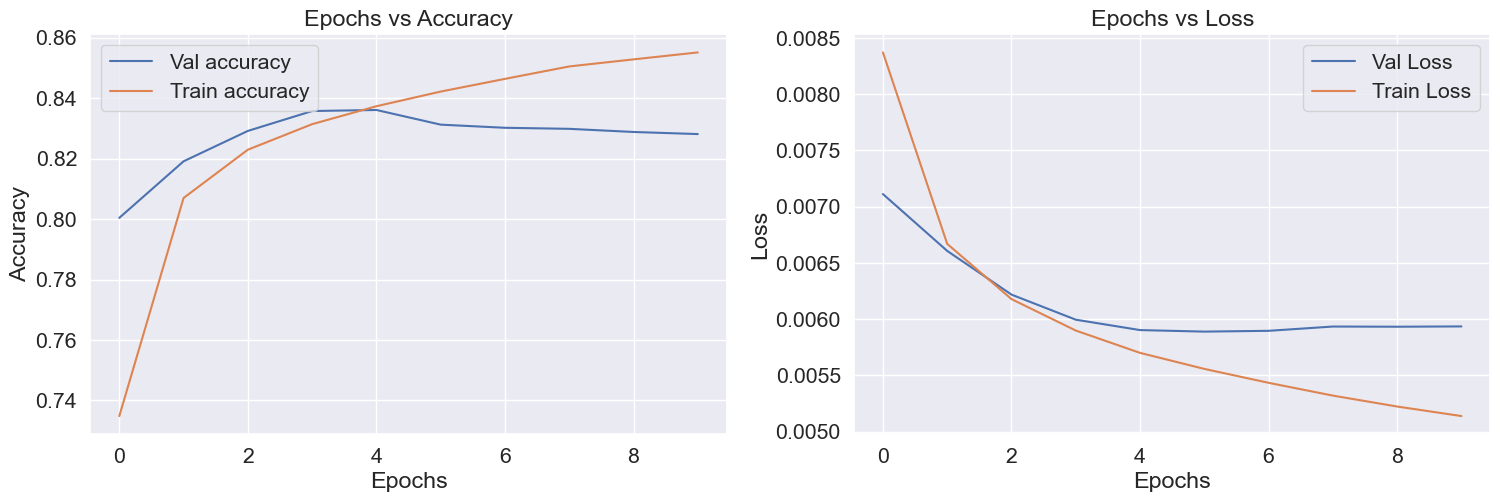

In [71]:
import matplotlib.pyplot as plt

def plot(epochs,val_acc,train_acc,val_loss,train_loss):
    epochs=range(epochs)
    fig,axes=plt.subplots(1,2,figsize=(10,5))
    plt.subplots_adjust(left=0.1, right=1.5, bottom=0.1, top=0.9)
    axes[0].plot(epochs,val_acc)
    axes[0].plot(epochs,train_acc)
    axes[0].set_title("Epochs vs Accuracy")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend(['Val accuracy','Train accuracy'])

    axes[1].plot(epochs,val_loss)
    axes[1].plot(epochs,train_loss)
    axes[1].set_title("Epochs vs Loss")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Loss")
    axes[1].legend(['Val Loss','Train Loss'])
    plt.show()
    
plot(epochs,val_accuracy_arr,train_accuracy_arr,val_loss_arr,train_loss_arr)

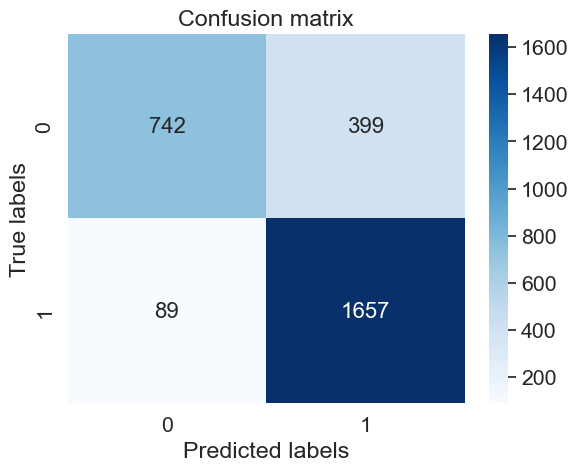

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion_mat(true_labels,pred_labels):
    cm=confusion_matrix(true_labels,pred_labels)
    sns.set(font_scale=1.4) 
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion matrix")
    plt.show()
confusion_mat(gt_labels,pred_labels)

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score
def scores(true_labels,pred_labels):
    precision=precision_score(true_labels,pred_labels)
    recall=recall_score(true_labels,pred_labels)
    f1=f1_score(true_labels,pred_labels)
    print(f"Precision:{precision:.2f}\nRecall:{recall:.2f}\nF1 score:{f1:.2f}")
scores(gt_labels,pred_labels)

Precision:0.81
Recall:0.95
F1 score:0.87


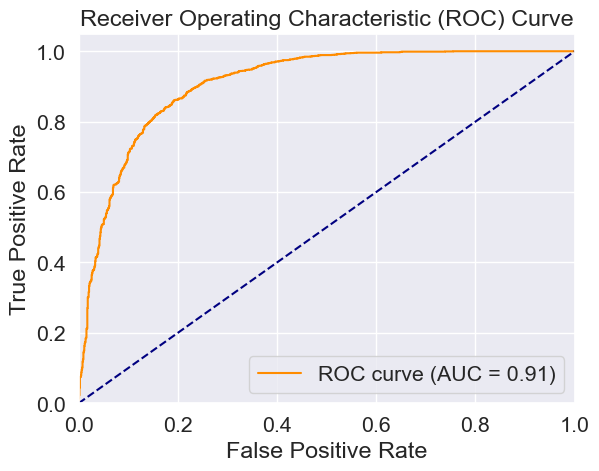

In [74]:
from sklearn.metrics import roc_curve, auc

def roc_plot(true_labels,pred_probs):
    fpr, tpr, _ = roc_curve(true_labels, pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
roc_plot(gt_labels, pred_prob)

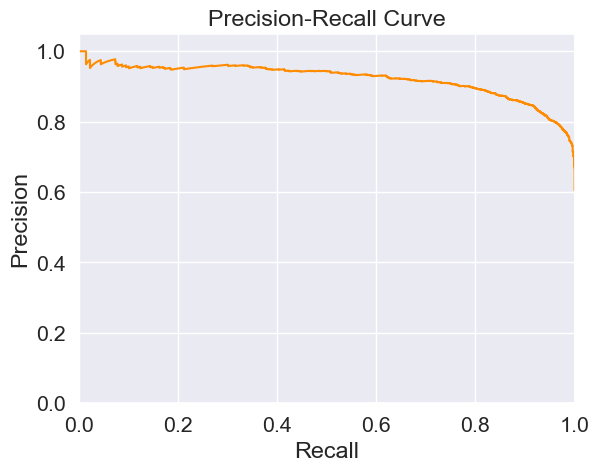

In [75]:
from sklearn.metrics import precision_recall_curve
def prec_recall_curve(true_labels,pred_probs):
    precision, recall, _ = precision_recall_curve(true_labels, pred_probs)
    plt.figure()
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.show()
prec_recall_curve(gt_labels,pred_prob)

In [76]:
# news = "one claims report vindicating new jersey gov chris christie bridge scandal conclusive candidates biography infrastructure rudy giuliani attorney new york republican comments nbc meet press"
# news = "Social Security Administration data shows the number of voters registering without a photo ID is skyrocketing in three key swing states, evidence that migrants who entered the country illegally are registering to vote in Arizona, Texas and Pennsylvania"
news = "The National Football Conference (NFC) champion Philadelphia Eagles defeated the American Football Conference (AFC) and defending Super Bowl LI champion New England Patriots, 41–33, to win their first Super Bowl and their first NFL title since 1960."

In [77]:
tokenized_news = text_pipeline(news)
news_tensor = torch.tensor(tokenized_news).unsqueeze(0).to(device)
# print(news_tensor.shape)
outputs = glove_transformer_model(news_tensor)
preds = (outputs.item()>0.5)

if preds == 0:
    print(f"Fake news with probability: {1 - outputs.item()}")
else:
    print(f"Genuine News with probability: {outputs.item()}")

Genuine News with probability: 0.9460720419883728


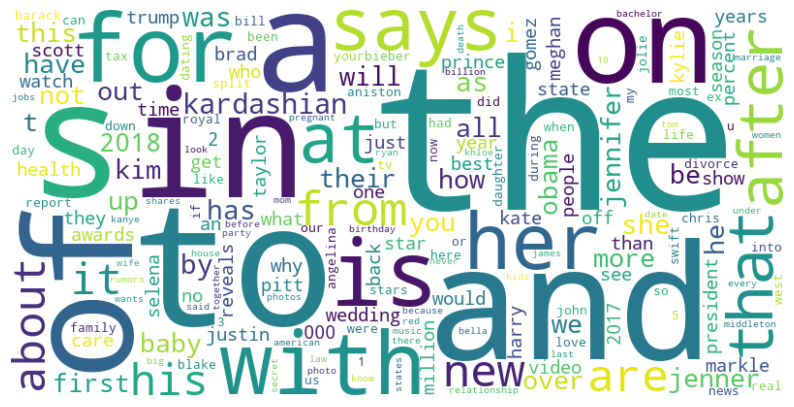

In [78]:
from wordcloud import WordCloud
from collections import Counter

word_counts = Counter()

statements = df['statement'].apply(remove_stopwords)


for statement in statements:
    words = statement.split()
    word_counts.update(words)

word_cloud = WordCloud(width=800, height=400, background_color='white')
word_cloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear', cmap='viridis')
plt.axis('off')
plt.show()

In [79]:
import pandas as pd
dataframe="Dataset\Combined_Data.csv"
df_clean=pd.read_csv(dataframe)

In [80]:
df_clean['statement']=df_clean['statement'].apply(remove_punctuations)
# df_clean['statement']=df_clean['statement'].apply(remove_stopwords)

In [81]:
df_clean.tail()

Unnamed: 0                                          statement  label
28860       28860  jimmy fallon and miley cyrus photobomb unsuspe...      1
28861       28861  exclusive  farrah abraham storms off  marriage...      1
28862       28862  elton john opens up about losing princess dian...      1
28863       28863  papa rob kardashian spends his st  patty s day...      1
28864       28864  7 celebrity summer fashion trends that don t l...      1

In [82]:
X=df_clean['statement']
y=df_clean['label']
print(X.head())
print(y.head())

0    kim kardashian shares new images from makeup c...
1    says illinois democrat david gill would end me...
2    aaron carter worried about past gay lovers rev...
3                                          awards news
4    angelina jolie gets new divorce lawyer amid br...
Name: statement, dtype: object
0    1
1    0
2    0
3    1
4    0
Name: label, dtype: int64


In [83]:
data=list(zip(y,X))
print(data)

[(1, 'kim kardashian shares new images from makeup collaboration with kylie jenner'), (0, 'says illinois democrat david gill would end medicare '), (0, 'aaron carter worried about past gay lovers revealing secrets is fake news'), (1, 'awards news'), (0, 'angelina jolie gets new divorce lawyer amid brad pitt custody battle'), (1, 'try not to get jealous reading about ellen degeneres  star studded 60th birthday party'), (1, 'james van der beek and wife kimberly welcome baby no  5 '), (1, 'yes  that is queen elizabeth sitting next to anna wintour in the front row of london fashion week'), (1, '5 reasons kristen bell is going to ace hosting the sag awards'), (1, 'usher dances with julianne hough and rita ora to   yeah    at party'), (1, 'kim kardashian must be confident in her double sided tape  goes shirtless at lacma gala'), (1, 'raven s home'), (1, 'abby lee miller sentenced to a year and a day in prison'), (1, 'nicole curtis separated from son on thanksgiving'), (0, 'tobey maguire scor

## 1. Bert Model
## 2. Bert-CNN Model
## 3. Bert-LSTM Model

In [84]:
from transformers import BertTokenizer,BertModel
import torch
import torch.optim as optim
from torch.utils.data import TensorDataset,random_split,DataLoader
import torch.nn as nn
from utils import plot,confusion_mat,scores,roc_plot,prec_recall_curve

bert = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(X), truncation=True,padding=True)
train_labels = torch.tensor(y.values)
dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              train_labels)


train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train, val, test = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))
train_data_bert = DataLoader(train, batch_size=64)
val_data_bert = DataLoader(val, batch_size=64)
test_data_bert = DataLoader(test, batch_size=64)



c:\Users\kesha\gpu_env\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [85]:
for params in bert.parameters():
    params.requires_grad=False

In [86]:
for data in train_data_bert:
    input_ids,attention_mask,labels=data

    outputs=bert(input_ids,attention_mask=attention_mask)
    print(outputs.last_hidden_state.shape)
    break

torch.Size([64, 70, 768])


In [87]:
class NewsBERT(nn.Module):
    def __init__(self):
        super(NewsBERT,self).__init__()
        self.bert=bert
        
        self.fc1=nn.Linear(70*768,128)
        self.fc2=nn.Linear(128,32)
        self.fc3=nn.Linear(32,1)
        
    def forward(self,x,y):
        x=self.bert(x,y)
        last_hidden_state=x.last_hidden_state
        x=nn.Flatten()(last_hidden_state)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=nn.Sigmoid()(x)
        return x
        

In [88]:
import torch.nn as nn

class conv_layer(nn.Module):
    def __init__(self):
        super(conv_layer,self).__init__()
        self.conv1=nn.Conv1d(in_channels=70,out_channels=70,kernel_size=3)
        self.relu=nn.ReLU()
        self.pool1=nn.MaxPool1d(2,stride=2)
#         self.pool2=nn.MaxPool1d(2,stride=2)
        
#         self.conv2=nn.Conv1d(in_channels=64,out_channels=32,kernel_size=5)
        
#         self.conv3=nn.Conv1d(in_channels=32,out_channels=16,kernel_size=3)
        
    def forward(self,x):
        x=self.conv1(x)
        x=self.relu(x)
        x=self.pool1(x)
        
#         x_skip1=self.conv1(x)
#         x=self.relu(x_skip1)
#         x=self.pool1(x)
        
        
#         x_skip2=self.conv2(x)
        
#         x=self.pool1(x_skip1)
#         x=self.conv2(x)
#         x=self.relu(x)
        
#         x_combined=x+x_skip2
        
#         x=self.pool1(x_combined)
#         x=self.conv3(x)
#         x=self.relu(x)
#         x=self.pool2(x)
        return x

In [89]:
class NewsBERT_CNN(nn.Module):
    def __init__(self):
        super(NewsBERT_CNN,self).__init__()
        self.bert=bert
        
        self.conv=conv_layer()
#         self.conv1=nn.Conv1d(in_channels=70,out_channels=70,kernel_size=3,stride=2)
#         self.relu=nn.ReLU()
#         self.maxpool=nn.MaxPool1d(kernel_size=3,stride=2)
        
        self.fc1=nn.Linear(70*383,128)
        self.fc2=nn.Linear(128,32)
        self.fc3=nn.Linear(32,1)
        
#         self.fc1=nn.Linear(768,128)
#         self.fc2=nn.Linear(128,32)
#         self.fc3=nn.Linear(32,1)


    def forward(self,x,y):
#         x=self.bert(x,y)
#         x=x.last_hidden_state
#         x=self.layernorm(x)
#         x,_=self.LSTM(x)
#         x=x[:,-1,:]
#         x=self.fc1(x)
#         x=nn.ReLU()(x)
#         x=self.fc2(x)
#         x=nn.ReLU()(x)
#         x=self.fc3(x)
#         x=nn.Sigmoid()(x)
        x=self.bert(x,y)
        last_hidden_state=x.last_hidden_state
        x=self.conv(last_hidden_state)
#         x=self.conv1(last_hidden_state)
#         x=self.relu(x)
#         x=self.maxpool(x)
#         x=nn.Flatten()(x)
#         x=self.bert(x,y)
#         last_hidden_state=x.last_hidden_state
#         x=last_hidden_state.mean(dim=1)
        x=nn.Flatten()(x)
        x=nn.Dropout(0.5)(x)
        x=self.fc1(x)
        x=nn.ReLU()(x)
        x=self.fc2(x)
        x=nn.ReLU()(x)
        x=self.fc3(x)
        x=nn.Sigmoid()(x)

        return x

In [90]:
class NewsBERT_LSTM(nn.Module):
    def __init__(self):
        super(NewsBERT_LSTM,self).__init__()
        self.bert=bert
        

        self.conv=conv_layer()
        
        self.LSTM=nn.LSTM(input_size=383,hidden_size=64,batch_first=True,bidirectional=True,num_layers=1)
        self.layernorm=nn.LayerNorm(64*2)

#         self.LSTM=nn.GRU(input_size=768,hidden_size=128,batch_first=True,bidirectional=True,num_layers=1)
        self.fc1=nn.Linear(64*2,64)
        self.fc2=nn.Linear(64,32)
        self.fc3=nn.Linear(32,1)


    def forward(self,x,y):
        x,y=x.int(),y.int()
        x=self.bert(x,y)
        x=x.last_hidden_state
#         x=nn.Dropout(0.2)(x)
        
        x=self.conv(x)
        
        
        x,(hn,cn)=self.LSTM(x)
        x=self.layernorm(x)
#         print("hn shape",hn.shape)
#         print("output shape",x.shape)
#         print(hn[0])
#         print(x[:,-1,:])
        x=x[:,-1,:]
        
        x=self.fc1(x)
        x=nn.ReLU()(x)
        x=self.fc2(x)
        x=nn.ReLU()(x)
        x=self.fc3(x)
        x=nn.Sigmoid()(x)
#         x=self.bert(x,y)
#         last_hidden_state=x.last_hidden_state
#         x,_=self.LSTM(last_hidden_state)
# #         x=last_hidden_state.mean(dim=1)
# # #         x=x.pooler_output
#         x=x[:,-1,:]
# #         x=self.conv1(x.transpose(1,2))
# #         print(x.shape)
#         x=self.fc1(x)
#         x=nn.ReLU()(x)
#         x=self.fc2(x)
#         x=nn.ReLU()(x)
#         x=self.fc3(x)
#         x=nn.Sigmoid()(x)

        return x

## 1.BERT Model

In [91]:
model0=NewsBERT()
device='cuda' if torch.cuda.is_available() else 'cpu'
model0.to(device)
optimizer=optim.Adam(model0.parameters(),lr=10**(-4))
criterion=nn.BCELoss()

val_loss=[]
train_loss=[]
val_acc=[]
train_acc=[]
epochs=15
for epoch in range(epochs):
    corrects=0
    running_loss=0.0
    count=0
    model0.train()
    for i,data in enumerate(train_data_bert):
        inputs,attention_mask,labels=data

        inputs=inputs.to(device)
        attention_mask=attention_mask.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        outputs=model0(inputs,attention_mask).reshape(-1)
        loss=criterion(outputs.float(),labels.float())
        preds=(outputs>0.5).int()
        count+=len(preds)
        corrects+=torch.sum(preds==labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(f"After Epoch {epoch+1} | loss:{running_loss/count} | train_accuracy:{corrects/count}")
    train_loss.append(running_loss/count)
    train_acc.append(corrects.item()/count)
    corrects=0
    running_loss=0.0
    count=0
    model0.eval()
    with torch.no_grad():
        for data in val_data_bert:
            inputs,att_mask,labels=data
            inputs=inputs.to(device)
            att_mask=att_mask.to(device)
            labels=labels.to(device)
            outputs=model0(inputs,att_mask).reshape(-1)
            loss=criterion(outputs.float(),labels.float())
            preds=(outputs>0.5).int()
            count+=len(preds)
            corrects+=torch.sum(preds==labels)
            running_loss+=loss.item()
    val_loss.append(running_loss/count)
    val_acc.append(corrects.item()/count)

    print(f"Val Loss:{running_loss/count} | accuracy:{corrects/count}")


After Epoch 1 | loss:0.006428213987842127 | train_accuracy:0.8151307702064514
Val Loss:0.00605328986195335 | accuracy:0.8250173330307007
After Epoch 2 | loss:0.005619786795897891 | train_accuracy:0.8423696756362915
Val Loss:0.006168830607987409 | accuracy:0.8215522766113281
After Epoch 3 | loss:0.00523146049218101 | train_accuracy:0.8547981977462769
Val Loss:0.006279119265240592 | accuracy:0.8243243098258972
After Epoch 4 | loss:0.004931058977931743 | train_accuracy:0.8661007881164551
Val Loss:0.006345079441142429 | accuracy:0.8205128312110901
After Epoch 5 | loss:0.004716840351157558 | train_accuracy:0.8722934126853943
Val Loss:0.00640162808739284 | accuracy:0.8198198080062866
After Epoch 6 | loss:0.004535925837074598 | train_accuracy:0.8766672611236572
Val Loss:0.006518096680483798 | accuracy:0.8142758011817932
After Epoch 7 | loss:0.004355632773105738 | train_accuracy:0.8826000094413757
Val Loss:0.006370569692249523 | accuracy:0.8326402902603149
After Epoch 8 | loss:0.00416885142981

In [92]:
corrects=0
count=0
true_labels=[]
pred_labels=[]
pred_probs=[]
with torch.no_grad():
    model0.eval()
    for data in test_data_bert:
        inputs,att_mask,labels=data
        inputs=inputs.to(device)
        att_mask=att_mask.to(device)
        labels=labels.to(device)
        outputs=model0(inputs,att_mask).reshape(-1)
        pred_probs.append(outputs.tolist())
        preds=(outputs>0.5).int()
        pred_labels.append(preds.tolist())
        true_labels.append(labels.tolist())
        corrects+=torch.sum(preds==labels)
        count+=len(preds)

    print(f"Accuracy on test data: {(corrects/count*100)} %")

Accuracy on test data: 83.1659164428711 %


In [93]:
pred_labels=[y for x in pred_labels for y in x]
true_labels=[y for x in true_labels for y in x]
pred_probs=[y for x in pred_probs for y in x]

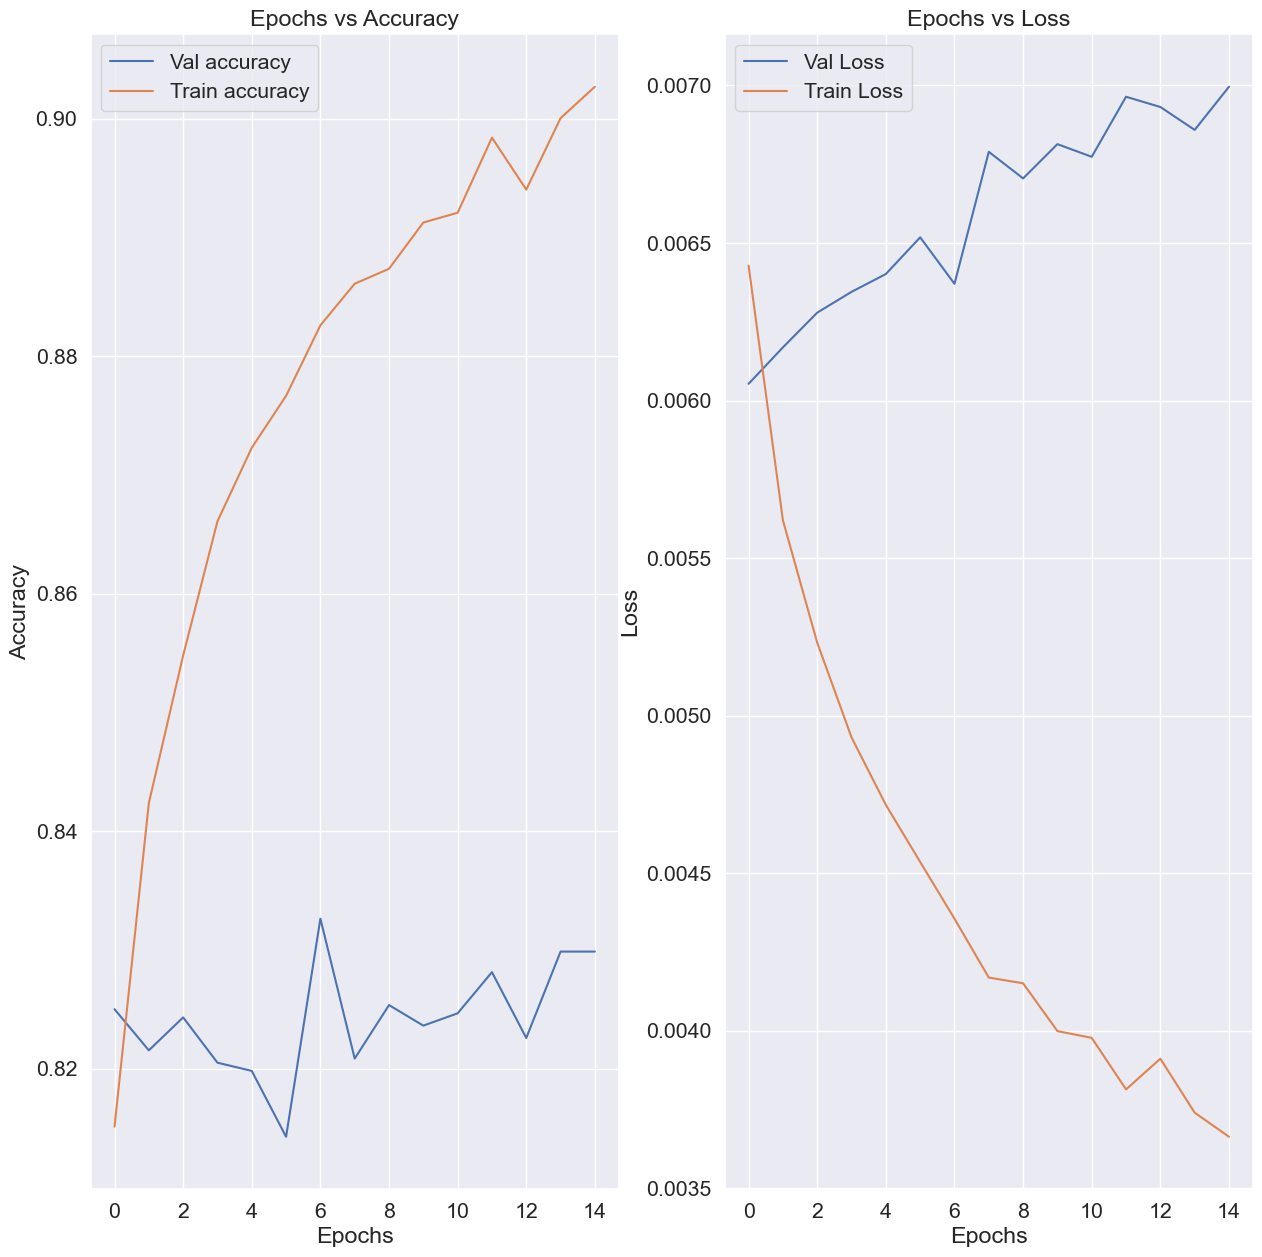

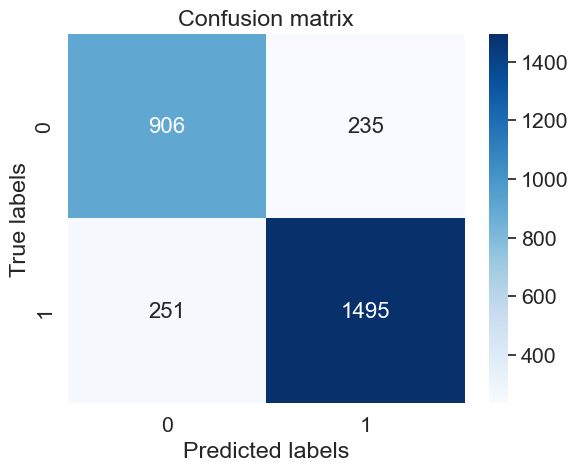

Precision:0.86
Recall:0.86
F1 score:0.86


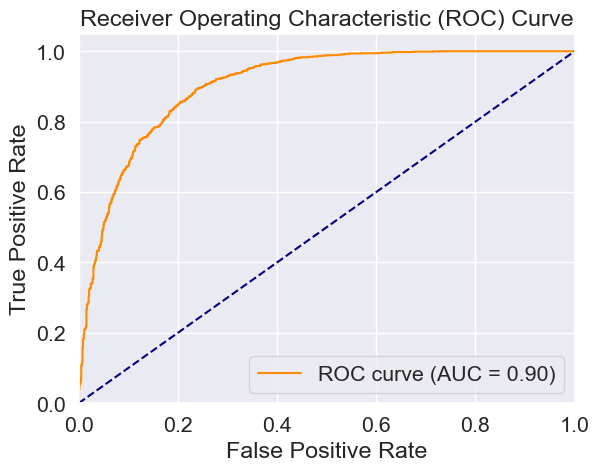

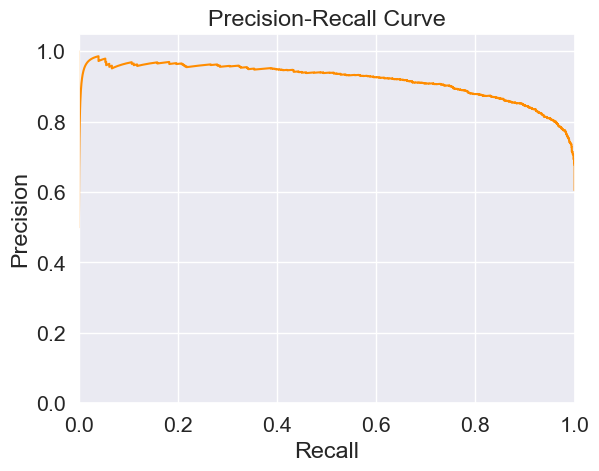

In [94]:
plot(epochs,val_acc,train_acc,val_loss,train_loss)
confusion_mat(true_labels,pred_labels)
scores(true_labels,pred_labels)
roc_plot(true_labels,pred_probs)
prec_recall_curve(true_labels,pred_probs)

In [95]:
total_params=sum([param.numel() for param in model0.parameters()])
print(f'Total parameters of the model:{total_params:,}')

Total parameters of the model:116,367,809


In [96]:
torch.save(model0,"model0.pt")

## 2.BERT-CNN Model

In [97]:
model1=NewsBERT_CNN()
device='cuda' if torch.cuda.is_available() else 'cpu'
model1.to(device)
optimizer=optim.Adam(model1.parameters(),lr=10**(-4))
criterion=nn.BCELoss()

val_loss=[]
train_loss=[]
val_acc=[]
train_acc=[]
epochs=15
for epoch in range(epochs):
    corrects=0
    running_loss=0.0
    count=0
    model1.train()
    for i,data in enumerate(train_data_bert):
        inputs,attention_mask,labels=data

        inputs=inputs.to(device)
        attention_mask=attention_mask.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        outputs=model1(inputs,attention_mask).reshape(-1)
        loss=criterion(outputs.float(),labels.float())
        preds=(outputs>0.5).int()
        count+=len(preds)
        corrects+=torch.sum(preds==labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(f"After Epoch {epoch+1} | loss:{running_loss/count} | train_accuracy:{corrects/count}")
    train_loss.append(running_loss/count)
    train_acc.append(corrects.item()/count)
    corrects=0
    running_loss=0.0
    count=0
    model1.eval()
    with torch.no_grad():
        for data in val_data_bert:
            inputs,att_mask,labels=data
            inputs=inputs.to(device)
            att_mask=att_mask.to(device)
            labels=labels.to(device)
            outputs=model1(inputs,att_mask).reshape(-1)
            loss=criterion(outputs.float(),labels.float())
            preds=(outputs>0.5).int()
            count+=len(preds)
            corrects+=torch.sum(preds==labels)
            running_loss+=loss.item()
    val_loss.append(running_loss/count)
    val_acc.append(corrects.item()/count)

    print(f"Val Loss:{running_loss/count} | accuracy:{corrects/count}")


After Epoch 1 | loss:0.007168852441979512 | train_accuracy:0.7871990203857422
Val Loss:0.006739454252267164 | accuracy:0.8139293193817139
After Epoch 2 | loss:0.0061655233414266465 | train_accuracy:0.8243547677993774
Val Loss:0.00641617285280036 | accuracy:0.820166289806366
After Epoch 3 | loss:0.005841361159688159 | train_accuracy:0.834401547908783
Val Loss:0.006349480841941331 | accuracy:0.8142758011817932
After Epoch 4 | loss:0.005657487315774769 | train_accuracy:0.8405075669288635
Val Loss:0.006057463384963371 | accuracy:0.8274428248405457
After Epoch 5 | loss:0.005499768802802897 | train_accuracy:0.8447081446647644
Val Loss:0.006029868308694844 | accuracy:0.827789306640625
After Epoch 6 | loss:0.005410626003440943 | train_accuracy:0.8480859398841858
Val Loss:0.006052049724946646 | accuracy:0.8295218348503113
After Epoch 7 | loss:0.005278645830882931 | train_accuracy:0.8523731231689453
Val Loss:0.006124162097730657 | accuracy:0.8305613398551941
After Epoch 8 | loss:0.00520931368265

In [98]:
corrects=0
count=0
true_labels=[]
pred_labels=[]
pred_probs=[]
with torch.no_grad():
    model1.eval()
    for data in test_data_bert:
        inputs,att_mask,labels=data
        inputs=inputs.to(device)
        att_mask=att_mask.to(device)
        labels=labels.to(device)
        outputs=model1(inputs,att_mask).reshape(-1)
        pred_probs.append(outputs.tolist())
        preds=(outputs>0.5).int()
        pred_labels.append(preds.tolist())
        true_labels.append(labels.tolist())
        corrects+=torch.sum(preds==labels)
        count+=len(preds)

    print(f"Accuracy on test data: {(corrects/count*100)} %")

Accuracy on test data: 84.6207046508789 %


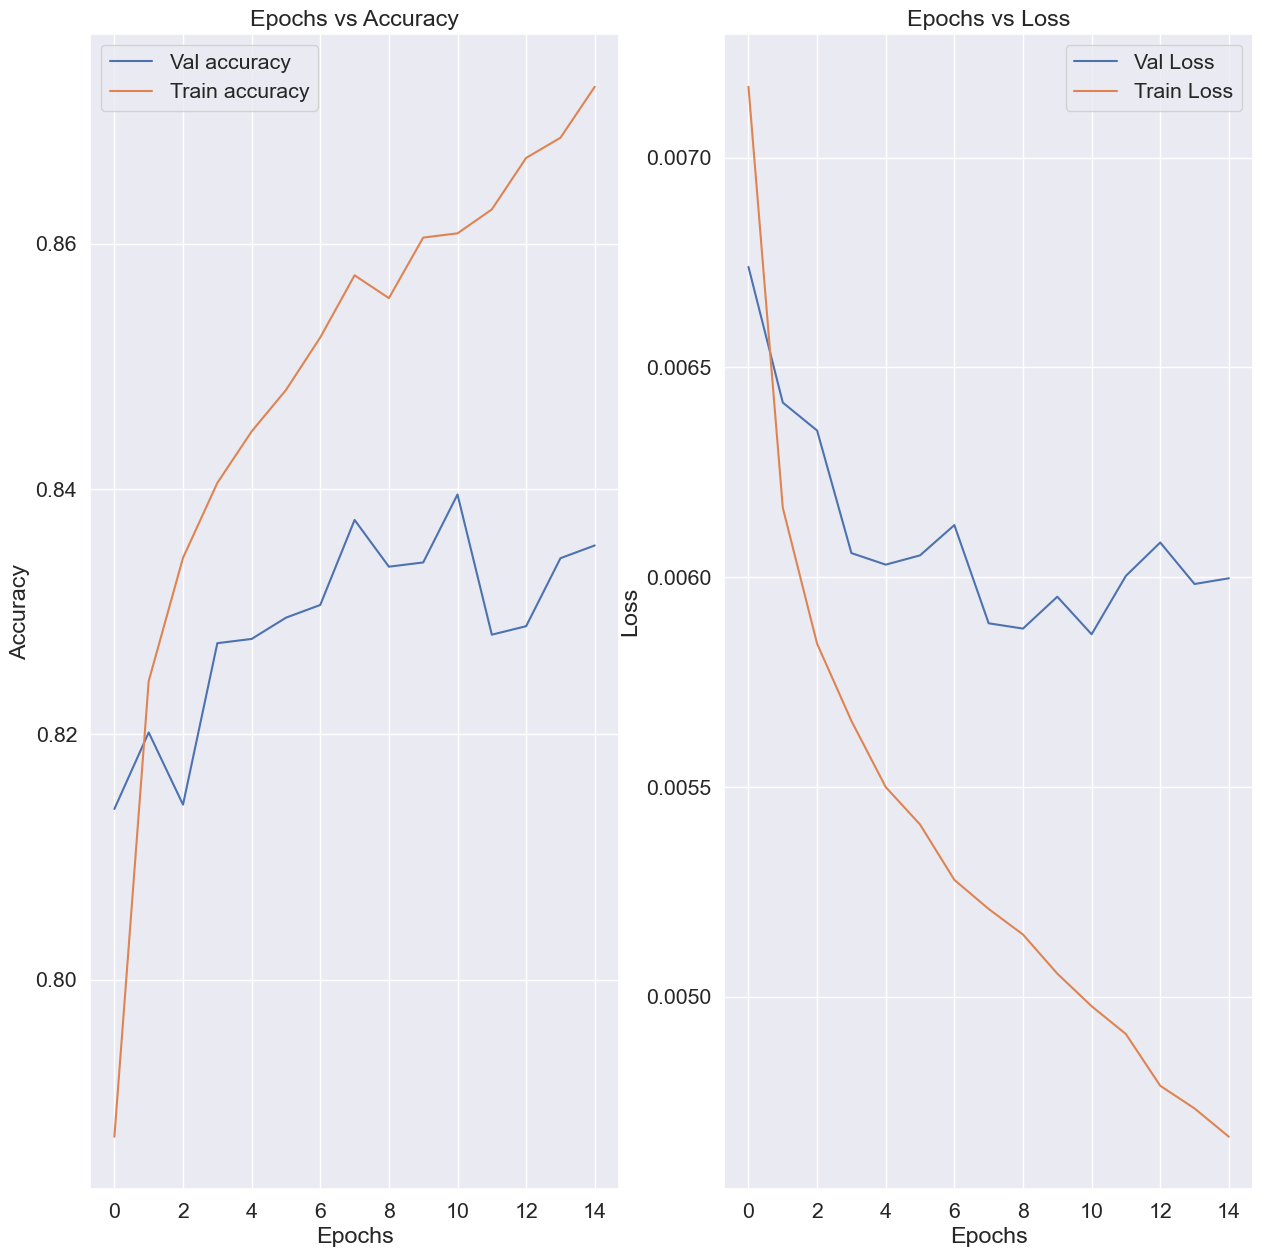

In [99]:
plot(epochs,val_acc,train_acc,val_loss,train_loss)

In [100]:
pred_labels=[y for x in pred_labels for y in x]
true_labels=[y for x in true_labels for y in x]
pred_probs=[y for x in pred_probs for y in x]

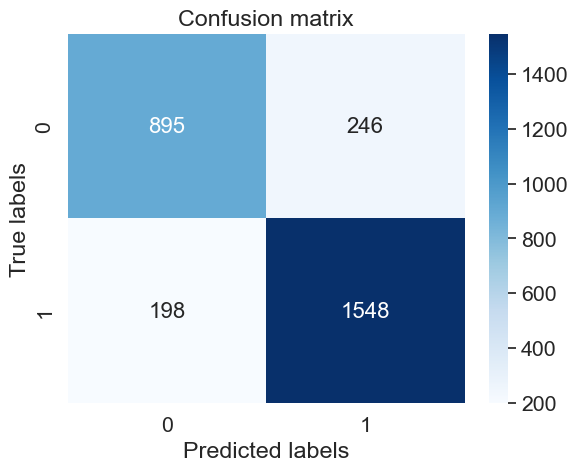

In [101]:
confusion_mat(true_labels,pred_labels)

In [102]:
scores(true_labels,pred_labels)

Precision:0.86
Recall:0.89
F1 score:0.87


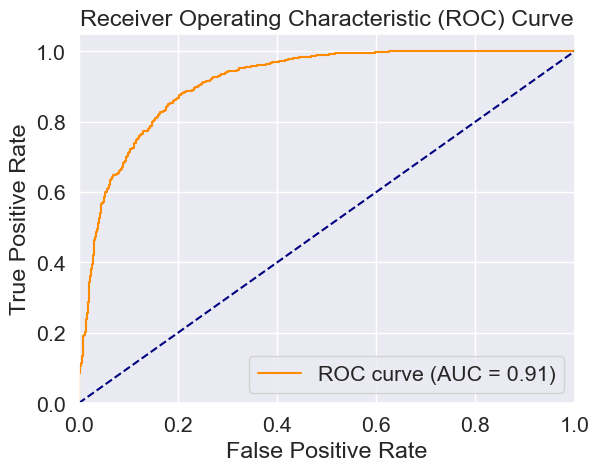

In [103]:
roc_plot(true_labels,pred_probs)

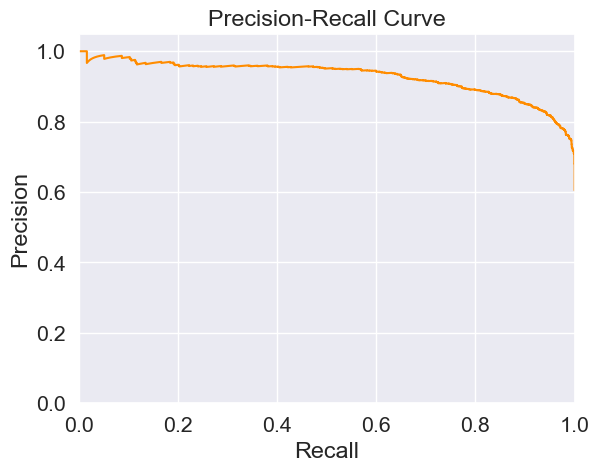

In [104]:
prec_recall_curve(true_labels,pred_probs)

In [105]:
total_params=sum([param.numel() for param in model1.parameters()])
print(f'Total parameters of the model:{total_params:,}')

Total parameters of the model:112,932,979


In [106]:
torch.save(model1,"model1.pt")

## 3.BERT-CNN-LSTM Model

In [107]:
model2=NewsBERT_LSTM()
device='cuda' if torch.cuda.is_available() else 'cpu'
model2.to(device)
optimizer=optim.Adam(model2.parameters(),lr=10**(-4))
criterion=nn.BCELoss()

val_loss=[]
train_loss=[]
val_acc=[]
train_acc=[]
for epoch in range(20):
    corrects=0
    running_loss=0.0
    count=0
    model2.train()
    for i,data in enumerate(train_data_bert):
        inputs,attention_mask,labels=data

        inputs=inputs.to(device)
        attention_mask=attention_mask.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        outputs=model2(inputs,attention_mask).reshape(-1)
        loss=criterion(outputs.float(),labels.float())
        preds=(outputs>0.5).int()
        count+=len(preds)
        corrects+=torch.sum(preds==labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(f"After Epoch {epoch+1} | loss:{running_loss/count} | train_accuracy:{corrects/count}")
    train_loss.append(running_loss/count)
    train_acc.append(corrects.item()/count)
    corrects=0
    running_loss=0.0
    count=0
    model2.eval()
    with torch.no_grad():
        for data in val_data_bert:
            inputs,att_mask,labels=data
            inputs=inputs.to(device)
            att_mask=att_mask.to(device)
            labels=labels.to(device)
            outputs=model2(inputs,att_mask).reshape(-1)
            loss=criterion(outputs.float(),labels.float())
            preds=(outputs>0.5).int()
            count+=len(preds)
            corrects+=torch.sum(preds==labels)
            running_loss+=loss.item()
    val_loss.append(running_loss/count)
    val_acc.append(corrects.item()/count)

    print(f"Val Loss:{running_loss/count} | accuracy:{corrects/count}")

After Epoch 1 | loss:0.008358834466559623 | train_accuracy:0.738913893699646
Val Loss:0.006863570469415444 | accuracy:0.8073458075523376
After Epoch 2 | loss:0.00660163676116158 | train_accuracy:0.8083319067955017
Val Loss:0.0064298563165046735 | accuracy:0.8167012929916382
After Epoch 3 | loss:0.006159130620668361 | train_accuracy:0.8203274011611938
Val Loss:0.006232105334930261 | accuracy:0.8243243098258972
After Epoch 4 | loss:0.005962767357401267 | train_accuracy:0.8276892304420471
Val Loss:0.006112340866114972 | accuracy:0.8336797952651978
After Epoch 5 | loss:0.00580558240047138 | train_accuracy:0.8371297717094421
Val Loss:0.006044143275180296 | accuracy:0.8326402902603149
After Epoch 6 | loss:0.005724431046363945 | train_accuracy:0.8362203240394592
Val Loss:0.0059844401051249675 | accuracy:0.8364518284797668
After Epoch 7 | loss:0.005601054947018603 | train_accuracy:0.8406807780265808
Val Loss:0.005945148492491419 | accuracy:0.8367983102798462
After Epoch 8 | loss:0.005512238573

In [108]:
corrects=0
count=0
pred_labels=[]
true_labels=[]
pred_probs=[]
with torch.no_grad():
    model2.eval()
    for data in test_data_bert:
        inputs,att_mask,labels=data
        inputs=inputs.to(device)
        att_mask=att_mask.to(device)
        labels=labels.to(device)
        outputs=model2(inputs,att_mask).reshape(-1)
        pred_probs.append(outputs.tolist())
        preds=(outputs>0.5).int()
        pred_labels.append(preds.tolist())
        true_labels.append(labels.tolist())
        corrects+=torch.sum(preds==labels)
        count+=len(preds)
    print(f"Accuracy on test data: {(corrects/count*100)} %")

Accuracy on test data: 84.8631820678711 %


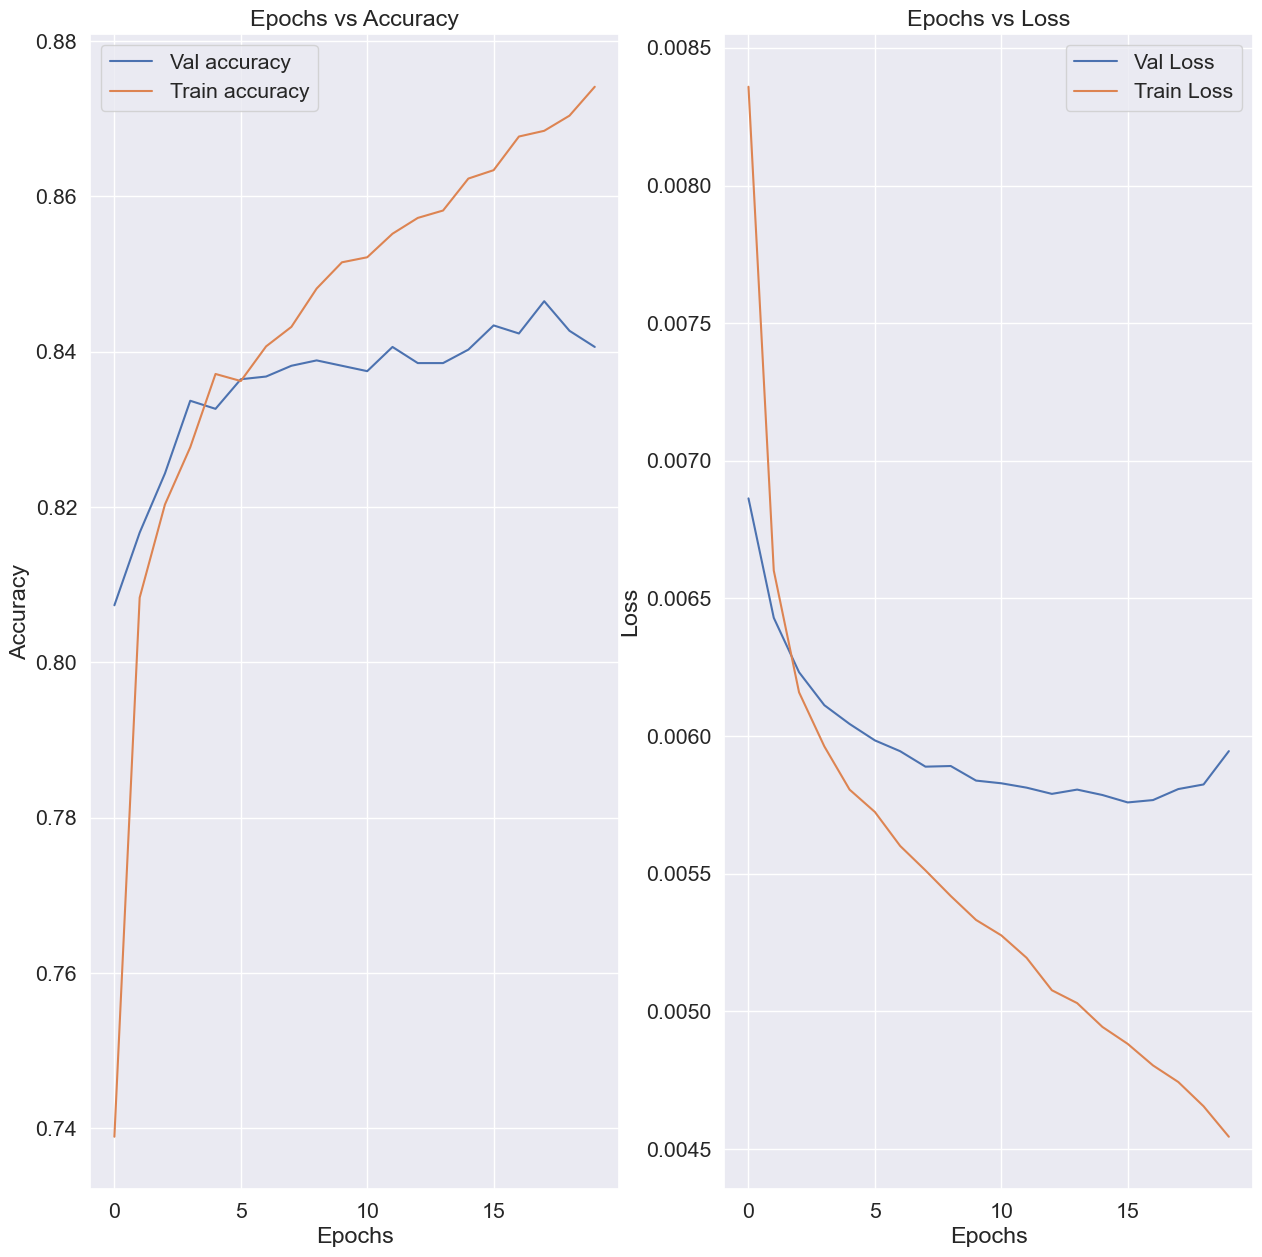

In [109]:
plot(20,val_acc,train_acc,val_loss,train_loss)

In [110]:
pred_labels=[y for x in pred_labels for y in x]
true_labels=[y for x in true_labels for y in x]
pred_probs=[y for x in pred_probs for y in x]

In [111]:
scores(true_labels,pred_labels)

Precision:0.87
Recall:0.88
F1 score:0.88


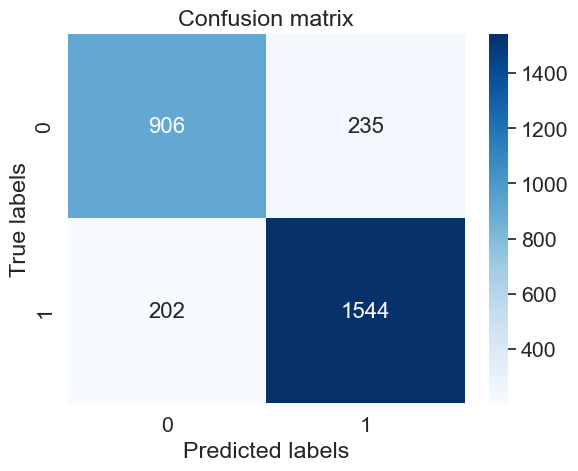

In [112]:
confusion_mat(true_labels,pred_labels)

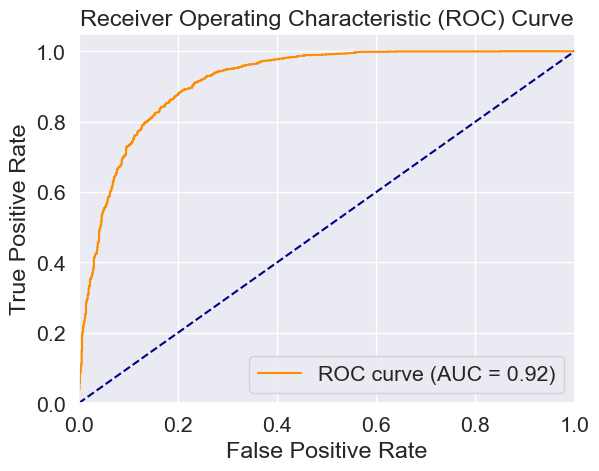

In [113]:
roc_plot(true_labels,pred_probs)

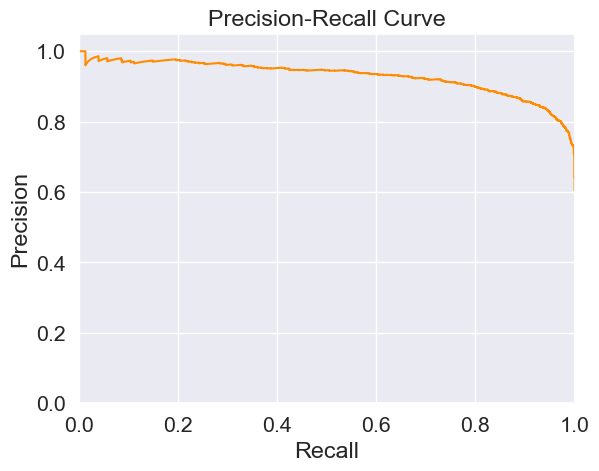

In [114]:
prec_recall_curve(true_labels,pred_probs)

In [115]:
total_params=sum([param.numel() for param in model2.parameters()])
print(f'Total parameters of the model:{total_params:,}')

Total parameters of the model:109,737,523


In [116]:
torch.save(model2,'model2.pt')

In [117]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def test(model0,model1,model2,text):
#   tokenized_text=text_pipeline(text)
#   print(tokenized_text)
#   tokenized_text=torch.tensor(tokenized_text).to(device).unsqueeze(0)
  tokenized_text=tokenizer.encode_plus(text,max_length=70,pad_to_max_length=True)
  input_ids,attn_mask=torch.tensor(tokenized_text['input_ids']),torch.tensor(tokenized_text['attention_mask'])
  input_ids=input_ids.to(device)
  attn_mask=attn_mask.to(device)
  with torch.no_grad():
        
    model0.eval()
    model1.eval()
    model2.eval()
    
    pred1=model0(input_ids.unsqueeze(0),attn_mask.unsqueeze(0))
    pred2=model1(input_ids.unsqueeze(0),attn_mask.unsqueeze(0))
    pred3=model2(input_ids.unsqueeze(0),attn_mask.unsqueeze(0))
    pred=(pred1+pred2+pred3)/3

    
    if pred.item()>0.6:
        return (f'True News with probability of {pred.item():.2f}')
    else:
      return (f'Fake News with probability of {1-pred.item():.2f}')

# model=torch.load('model.pt')
text="This one is fake news"
news=remove_punctuations(text)
print(test(model0,model1,model2,news))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


True News with probability of 0.75


c:\Users\kesha\gpu_env\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [118]:
## Testing on LIAR and FakeNewsNet seperately

In [120]:
df_fakenet=pd.read_csv("Dataset\FakeNewsNet.csv")
df_liar=pd.read_csv("Dataset\Liar.csv")

# df_fakenet['label']=df_fakenet['label'].replace({0:1,1:0})
# df_liar['label']=df_liar['label'].replace({0:1,1:0})

In [121]:
import pandas as pd
from transformers import BertTokenizer
import torch
from torch.utils.data import TensorDataset,DataLoader

df_fakenet['statement']=df_fakenet['statement'].apply(remove_punctuations)
df_liar['statement']=df_liar['statement'].apply(remove_punctuations)


X_fakenet=df_fakenet['statement']
y_fakenet=df_fakenet['label']

X_liar=df_liar['statement']
y_liar=df_liar['label']

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(X_fakenet), truncation=True,padding=True,max_length=70)
train_labels = torch.tensor(y_fakenet.values)
train_data = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              train_labels)


dataset_fakenet=DataLoader(train_data,batch_size=64)



In [122]:
from torch.nn.utils.rnn import pad_sequence

# tokenized_texts = [tokenizer.tokenize(text) for text in list(X_liar)]
# input_ids = [tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts]
# max_length = 70
# train_encodings = pad_sequence([torch.tensor(ids) for ids in input_ids], 
#                                 batch_first=True, padding_value=0)
# print(train_encodings)

train_encodings = tokenizer(list(X_liar),padding=True,max_length=70,truncation=True)

train_labels = torch.tensor(y_liar.values)
train_data = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              train_labels)
dataset_liar=DataLoader(train_data,batch_size=64)


In [123]:
device='cuda' if torch.cuda.is_available() else "cpu"
model=torch.load("model2.pt")
model.to(device)

NewsBERT_LSTM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_aff

In [124]:
corrects=0
count=0
with torch.no_grad():
    model.eval()
    for data in dataset_liar:
        inputs,att_mask,labels=data
        inputs=inputs.to(device)
        att_mask=att_mask.to(device)
        labels=labels.to(device)
        outputs=model(inputs,att_mask).reshape(-1)
#         pred_probs.append(outputs.tolist())
        preds=(outputs>0.5).int()
#         pred_labels.append(preds.tolist())
#         true_labels.append(labels.tolist())
        corrects+=torch.sum(preds==labels)
        count+=len(preds)

    print(f"Accuracy on LIAR Dataset: {(corrects/count*100)} %")

Accuracy on LIAR Dataset: 44.37519454956055 %


In [125]:
corrects=0
count=0
with torch.no_grad():
    model.eval()
    for data in dataset_fakenet:
        inputs,att_mask,labels=data
        inputs=inputs.to(device)
        att_mask=att_mask.to(device)
        labels=labels.to(device)
        outputs=model(inputs,att_mask).reshape(-1)
#         pred_probs.append(outputs.tolist())
        preds=(outputs>0.5).int()
#         pred_labels.append(preds.tolist())
#         true_labels.append(labels.tolist())
        corrects+=torch.sum(preds==labels)
        count+=len(preds)

    print(f"Accuracy on FakeNewsNet Dataset: {(corrects/count*100)} %")

Accuracy on FakeNewsNet Dataset: 85.88118743896484 %
